<a href="https://colab.research.google.com/github/Siyaram322/Classification/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Load the data
df = pd.read_csv('Health and Nutrition Statistics2.csv', encoding='latin1')
df

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,Afghanistan,AFG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,14.78499985,14.85099983,14.9090004,14.91699982,14.9119997,14.9659996,...,15.22099972,14.87699986,14.69400024,14.70899963,15.25800037,15.99199963,16.85899925,17.7859993,18.71699905,19.41900063
1,Afghanistan,AFG,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,86.67500305,86.65200043,86.61100006,86.5530014,86.48000336,86.39600372,...,86.89299774,86.77899933,86.66000366,86.54499817,86.53199768,86.54100037,86.5739975,86.63300323,86.71499634,86.71700287
2,Afghanistan,AFG,"Labor force participation rate, total (% of to...",SL.TLF.CACT.ZS,51.39199829,51.53099823,51.68000031,51.7859993,51.8429985,51.88399887,...,52.31100082,51.98500061,51.75500107,51.65399933,51.94900131,52.36100006,52.85599899,53.38299942,53.9070015,54.23400116
3,Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,3270825,3480811,3759162,4067992,4365798,4631347,...,7264788,7390836,7549815,7766590,8126681,8560749,9051268,9567711,10087598,10551800
4,Afghanistan,AFG,"New business density (new registrations per 1,...",IC.BUS.NDNS.ZS,..,..,..,..,..,..,...,0.177423859,0.06853156,0.743902958,0.863396522,0.446882286,1.387436584,0.297501774,0.21120032,0.16674702,0.186023875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21783,Data from database: Jobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 2. Basic Cleaning (Remove footers and replace placeholders)
df = df.iloc[:-5].copy()
df.replace('..', np.nan, inplace=True)
new_columns = [col.split(' ')[0] if '[' in col else col for col in df.columns]
df.columns = new_columns
df

,Country Name,Country Code,Series Name,Series Code,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,14.78499985,14.85099983,14.9090004,14.91699982,14.9119997,14.9659996,...,15.22099972,14.87699986,14.69400024,14.70899963,15.25800037,15.99199963,16.85899925,17.7859993,18.71699905,19.41900063
1,Afghanistan,AFG,"Labor force participation rate, male (% of mal...",SL.TLF.CACT.MA.ZS,86.67500305,86.65200043,86.61100006,86.5530014,86.48000336,86.39600372,...,86.89299774,86.77899933,86.66000366,86.54499817,86.53199768,86.54100037,86.5739975,86.63300323,86.71499634,86.71700287
2,Afghanistan,AFG,"Labor force participation rate, total (% of to...",SL.TLF.CACT.ZS,51.39199829,51.53099823,51.68000031,51.7859993,51.8429985,51.88399887,...,52.31100082,51.98500061,51.75500107,51.65399933,51.94900131,52.36100006,52.85599899,53.38299942,53.9070015,54.23400116
3,Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,3270825,3480811,3759162,4067992,4365798,4631347,...,7264788,7390836,7549815,7766590,8126681,8560749,9051268,9567711,10087598,10551800
4,Afghanistan,AFG,"New business density (new registrations per 1,...",IC.BUS.NDNS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.177423859,0.06853156,0.743902958,0.863396522,0.446882286,1.387436584,0.297501774,0.21120032,0.16674702,0.186023875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21770,Zimbabwe,ZWE,"School enrollment, primary, male (% gross)",SE.PRM.ENRR.MA,100.0146713,106.368309,103.4508896,NaN,NaN,108.3075027,...,NaN,NaN,NaN,NaN,NaN,101.9148712,99.45429993,NaN,NaN,NaN
21771,Zimbabwe,ZWE,"School enrollment, secondary (% gross)",SE.SEC.ENRR,45.74100876,47.37607956,42.27048111,39.72714996,39.71804047,41.37942886,...,NaN,NaN,NaN,NaN,NaN,46.41661072,47.11383057,NaN,NaN,NaN
21772,Zimbabwe,ZWE,"School enrollment, secondary (gross), gender p...",SE.ENR.SECO.FM.ZS,0.880249977,0.787840009,0.786339998,0.79764998,0.816720009,0.83683002,...,NaN,NaN,NaN,NaN,NaN,0.970650017,0.980490029,NaN,NaN,NaN
21773,Zimbabwe,ZWE,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,42.82107162,41.74716949,37.21332169,35.25777054,35.71482086,37.70690918,...,NaN,NaN,NaN,NaN,NaN,45.72602844,46.65044022,NaN,NaN,NaN


In [ ]:
# Every row is a Country+Year, every column is an Indicator
df_ml = df_long.pivot_table(
    index=['Country Name', 'Country Code', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()


In [ ]:
df_ml

Series Name,Country Name,Country Code,Year,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Air transport, registered carrier departures worldwide","Automated teller machines (ATMs) (per 100,000 adults)","Borrowers from commercial banks (per 1,000 adults)",CPIA economic management cluster average (1=low to 6=high),CPIA financial sector rating (1=low to 6=high),...,"Unemployment with advanced education, male (% of male labor force with advanced education)",Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment with intermediate education, female (% of female labor force with intermediate education)","Unemployment with intermediate education, male (% of male labor force with intermediate education)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)"
0,Afghanistan,AFG,1990,0.010000,162.8354,5300.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1991,0.010000,163.3822,5300.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.561,11.616,12.031,26.888000,25.315001,25.589001
2,Afghanistan,AFG,1992,0.010000,163.9290,5300.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.068,10.085,10.645,25.454000,21.841000,22.469000
3,Afghanistan,AFG,1993,0.010000,164.1888,5100.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.702,11.988,12.368,27.205999,26.129000,26.315001
4,Afghanistan,AFG,1994,0.010000,164.4486,7000.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.669,11.916,12.299,27.145000,25.972000,26.173000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,Zimbabwe,ZWE,2012,36.728878,112.7670,11560.36785,4.345909,50.676440,2.000000,2.0,...,NaN,NaN,NaN,NaN,5.971,4.708,5.328,9.591000,7.474000,8.462000
6528,Zimbabwe,ZWE,2013,37.076813,111.0298,27684.00000,4.247220,51.697985,2.000000,2.0,...,NaN,NaN,NaN,NaN,5.877,4.555,5.205,9.548000,7.238000,8.315000
6529,Zimbabwe,ZWE,2014,32.300000,109.2926,3730.00000,5.235629,37.347559,2.333333,2.5,...,NaN,NaN,NaN,NaN,5.818,4.474,5.135,9.527000,7.127000,8.246000
6530,Zimbabwe,ZWE,2015,33.700000,107.5554,4145.00000,6.150878,34.298184,2.666667,3.0,...,NaN,NaN,NaN,NaN,5.774,4.422,5.086,9.516000,7.067000,8.208000


In [ ]:
# 4. Handle Missing Data
# Drop columns with >80% missing values
threshold = 0.8
df_ml = df_ml.loc[:, df_ml.isnull().mean() < threshold]
df_ml

Series Name,Country Name,Country Code,Year,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Air transport, registered carrier departures worldwide","Automated teller machines (ATMs) (per 100,000 adults)",Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP),Electric power consumption (kWh per capita),...,"Unemployment with advanced education, male (% of male labor force with advanced education)",Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment with intermediate education, female (% of female labor force with intermediate education)","Unemployment with intermediate education, male (% of male labor force with intermediate education)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)"
0,Afghanistan,AFG,1990,0.010000,162.8354,5300.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1991,0.010000,163.3822,5300.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.561,11.616,12.031,26.888000,25.315001,25.589001
2,Afghanistan,AFG,1992,0.010000,163.9290,5300.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.068,10.085,10.645,25.454000,21.841000,22.469000
3,Afghanistan,AFG,1993,0.010000,164.1888,5100.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.702,11.988,12.368,27.205999,26.129000,26.315001
4,Afghanistan,AFG,1994,0.010000,164.4486,7000.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.669,11.916,12.299,27.145000,25.972000,26.173000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,Zimbabwe,ZWE,2012,36.728878,112.7670,11560.36785,4.345909,NaN,NaN,542.729552,...,NaN,NaN,NaN,NaN,5.971,4.708,5.328,9.591000,7.474000,8.462000
6528,Zimbabwe,ZWE,2013,37.076813,111.0298,27684.00000,4.247220,NaN,NaN,557.573925,...,NaN,NaN,NaN,NaN,5.877,4.555,5.205,9.548000,7.238000,8.315000
6529,Zimbabwe,ZWE,2014,32.300000,109.2926,3730.00000,5.235629,NaN,NaN,536.995492,...,NaN,NaN,NaN,NaN,5.818,4.474,5.135,9.527000,7.127000,8.246000
6530,Zimbabwe,ZWE,2015,33.700000,107.5554,4145.00000,6.150878,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.774,4.422,5.086,9.516000,7.067000,8.208000


In [ ]:
# Identify numeric feature columns
numeric_cols = df_ml.select_dtypes(include=[np.number]).columns.tolist()
if 'Year' in numeric_cols:
    numeric_cols.remove('Year')

In [ ]:
# Fill missing values with the Mean
df_ml[numeric_cols] = df_ml[numeric_cols].fillna(df_ml[numeric_cols].mean())
df_ml

/tmp/ipython-input-994369305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml[numeric_cols] = df_ml[numeric_cols].fillna(df_ml[numeric_cols].mean())


Series Name,Country Name,Country Code,Year,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Air transport, registered carrier departures worldwide","Automated teller machines (ATMs) (per 100,000 adults)",Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP),Electric power consumption (kWh per capita),...,"Unemployment with advanced education, male (% of male labor force with advanced education)",Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment with intermediate education, female (% of female labor force with intermediate education)","Unemployment with intermediate education, male (% of male labor force with intermediate education)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)"
0,Afghanistan,AFG,1990,0.010000,162.8354,5300.00000,41.903064,62.228172,47.090588,3639.560785,...,5.980588,10.941049,8.438745,9.304834,9.963767,7.731282,8.444213,19.957968,16.295384,17.466351
1,Afghanistan,AFG,1991,0.010000,163.3822,5300.00000,41.903064,62.228172,47.090588,3639.560785,...,5.980588,10.941049,8.438745,9.304834,14.561000,11.616000,12.031000,26.888000,25.315001,25.589001
2,Afghanistan,AFG,1992,0.010000,163.9290,5300.00000,41.903064,62.228172,47.090588,3639.560785,...,5.980588,10.941049,8.438745,9.304834,14.068000,10.085000,10.645000,25.454000,21.841000,22.469000
3,Afghanistan,AFG,1993,0.010000,164.1888,5100.00000,41.903064,62.228172,47.090588,3639.560785,...,5.980588,10.941049,8.438745,9.304834,14.702000,11.988000,12.368000,27.205999,26.129000,26.315001
4,Afghanistan,AFG,1994,0.010000,164.4486,7000.00000,41.903064,62.228172,47.090588,3639.560785,...,5.980588,10.941049,8.438745,9.304834,14.669000,11.916000,12.299000,27.145000,25.972000,26.173000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,Zimbabwe,ZWE,2012,36.728878,112.7670,11560.36785,4.345909,62.228172,47.090588,542.729552,...,5.980588,10.941049,8.438745,9.304834,5.971000,4.708000,5.328000,9.591000,7.474000,8.462000
6528,Zimbabwe,ZWE,2013,37.076813,111.0298,27684.00000,4.247220,62.228172,47.090588,557.573925,...,5.980588,10.941049,8.438745,9.304834,5.877000,4.555000,5.205000,9.548000,7.238000,8.315000
6529,Zimbabwe,ZWE,2014,32.300000,109.2926,3730.00000,5.235629,62.228172,47.090588,536.995492,...,5.980588,10.941049,8.438745,9.304834,5.818000,4.474000,5.135000,9.527000,7.127000,8.246000
6530,Zimbabwe,ZWE,2015,33.700000,107.5554,4145.00000,6.150878,62.228172,47.090588,3639.560785,...,5.980588,10.941049,8.438745,9.304834,5.774000,4.422000,5.086000,9.516000,7.067000,8.208000


Boxplot generated and saved.


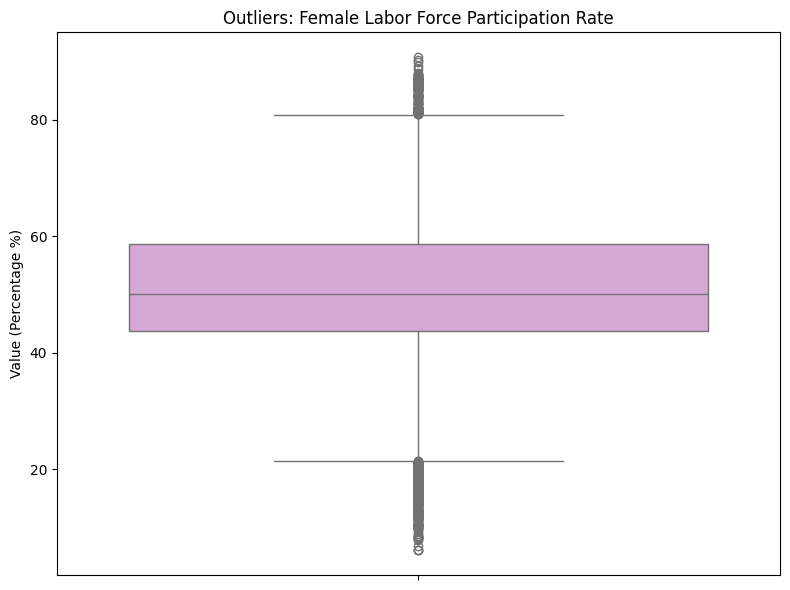

In [ ]:
# 5. Boxplot Visualization (Before Capping)
# Visualizing 'Labor force participation rate, female'
target_indicator = 'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)'

if target_indicator in df_ml.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_ml[target_indicator], color='plum')
    plt.title('Outliers: Female Labor Force Participation Rate', fontsize=12)
    plt.ylabel('Value (Percentage %)')
    plt.tight_layout()
    plt.savefig('female_labor_outliers_boxplot.png')
    print("Boxplot generated and saved.")

In [ ]:
# 6. Outlier Replacement (Capping at 1st and 99th Percentiles)
def cap_outliers(series):
    return series.clip(lower=series.quantile(0.01), upper=series.quantile(0.99))

df_capped = df_ml.copy()
for col in numeric_cols:
    df_capped[col] = cap_outliers(df_ml[col])

In [ ]:
# 7. Scaling (Standardization)
df_final_scaled = df_capped.copy()
scaler = StandardScaler()
df_final_scaled[numeric_cols] = scaler.fit_transform(df_capped[numeric_cols])

In [ ]:
# 8. Save the final file
df_final_scaled.to_csv('ML_Scaled_Health_Data_No_Outliers.csv', index=False)
print("File 'ML_Scaled_Health_Data_No_Outliers.csv' saved successfully.")

File 'ML_Scaled_Health_Data_No_Outliers.csv' saved successfully.


Mean Squared Error (MSE): 2.845361895890477e-05
R-squared (R2): 0.996377222104673


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(



Comparison on Test Set:
      Year  Actual (Scaled)  Predicted (Scaled)
6424  1990        -0.446236           -0.441796
6432  1998        -0.397114           -0.397629
6433  1999        -0.386921           -0.386522
6435  2001        -0.367204           -0.360585
6437  2003        -0.329691           -0.329683
6445  2011        -0.166757           -0.156424


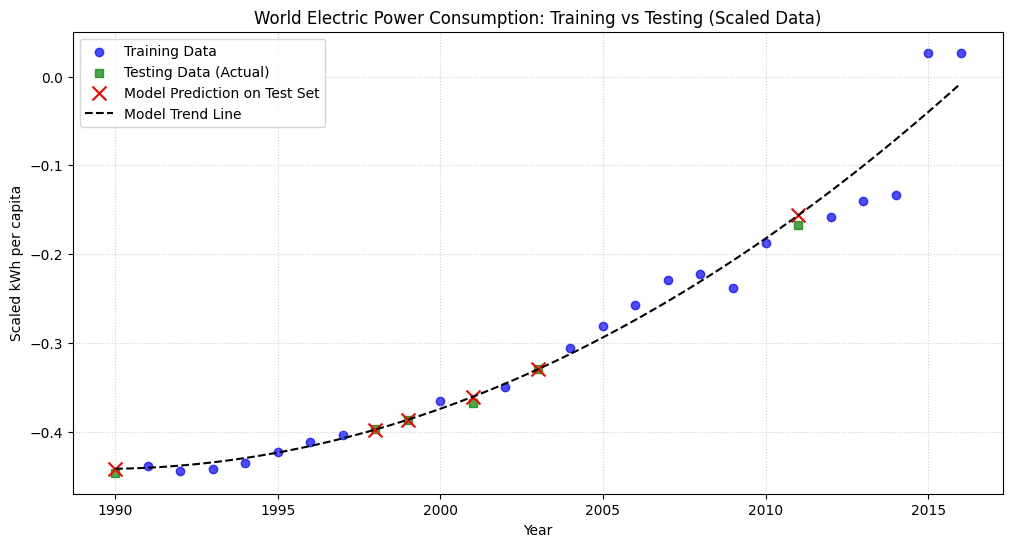

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the ML-ready dataset
df_ml = pd.read_csv('ML_Scaled_Health_Data_No_Outliers.csv')

# Filter for 'World'
world_data = df_ml[df_ml['Country Name'] == 'World'].copy().sort_values('Year')

# Define target column
target_col = 'Electric power consumption (kWh per capita)'

# Prepare features (X) and target (y)
X = world_data[['Year']]
y = world_data[target_col]

# 1. Use train_test_split
# Using 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sort training and testing sets for better visualization later
X_train_sorted = X_train.sort_index()
y_train_sorted = y_train.sort_index()
X_test_sorted = X_test.sort_index()
y_test_sorted = y_test.sort_index()

# 2. Training the model
# We use Polynomial Features (Degree 2) to capture the trend
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# 3. Testing the model
y_pred = model.predict(X_test_poly)

# 4. Evaluating Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# 5. Visualization
plt.figure(figsize=(12, 6))

# Plot training points
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)

# Plot testing points
plt.scatter(X_test, y_test, color='green', marker='s', label='Testing Data (Actual)', alpha=0.7)

# Plot predicted points for the test set
plt.scatter(X_test, y_pred, color='red', marker='x', s=100, label='Model Prediction on Test Set')

# Plot the smooth trend line
X_plot = np.linspace(X['Year'].min(), X['Year'].max(), 100).reshape(-1, 1)
y_plot = model.predict(poly.transform(X_plot))
plt.plot(X_plot, y_plot, color='black', linestyle='--', label='Model Trend Line')

plt.title('World Electric Power Consumption: Training vs Testing (Scaled Data)')
plt.xlabel('Year')
plt.ylabel('Scaled kWh per capita')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.savefig('train_test_results.png')

# Output some details for the response
test_comparison = pd.DataFrame({
    'Year': X_test['Year'],
    'Actual (Scaled)': y_test,
    'Predicted (Scaled)': y_pred
}).sort_values('Year')

print("\nComparison on Test Set:")
print(test_comparison)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Load the ML data
df_ml = pd.read_csv('ML_Scaled_Health_Data_No_Outliers.csv')
world_ml = df_ml[df_ml['Country Name'] == 'World'].sort_values('Year')
target_col = 'Electric power consumption (kWh per capita)'

X = world_ml[['Year']].values
y = world_ml[target_col].values

# 2. Train on the full dataset for the best 2017 prediction
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# 3. Predict for 2017 (Scaled)
pred_2017_scaled = model.predict(poly.transform([[2017]]))[0]

# 4. Get original data for inverse scaling
df_orig = pd.read_csv('Health and Nutrition Statistics2.csv', encoding='latin1')
world_orig = df_orig[(df_orig['Country Name'] == 'World') & (df_orig['Series Name'] == target_col)]
year_cols = [col for col in df_orig.columns if 'YR' in col]
ts_world = world_orig[year_cols].T
ts_world.columns = ['Consumption']
ts_world.index = [int(col.split('[YR')[1].split(']')[0]) for col in ts_world.index]
ts_world['Consumption'] = pd.to_numeric(ts_world['Consumption'], errors='coerce')
ts_world = ts_world.dropna()

# Calculate Mean and Std from original data used for scaling
# Note: The ML file was scaled based on the WHOLE dataset (all countries), not just World.
# So I need to calculate the mean and std of the 'Electric power consumption' column
# across all countries in the original dataset to perform the inverse transform correctly.

all_power_raw = []
power_rows = df_orig[df_orig['Series Name'] == target_col]
for col in year_cols:
    vals = pd.to_numeric(power_rows[col], errors='coerce').dropna().tolist()
    all_power_raw.extend(vals)

raw_mean = np.mean(all_power_raw)
raw_std = np.std(all_power_raw)

# 5. Inverse Transform the prediction
pred_2017_actual = (pred_2017_scaled * raw_std) + raw_mean

print(f"Predicted Scaled Value (Z-score) for 2017: {pred_2017_scaled}")
print(f"Predicted Actual Value for 2017: {pred_2017_actual} kWh per capita")

Predicted Scaled Value (Z-score) for 2017: 0.024515723833701486
Predicted Actual Value for 2017: 3757.3581472109418 kWh per capita
